# Fundamentos de Inteligência Artificial - Trabalho Prático 2

## Problema - Coloração de Grafos: 

In [2]:
import time
verbose = True

O problema de coloração em grafos em sua forma mais tradicional consiste na rotulação (atribuição de uma cor) de vértices de um grafo, os quais estão sujeitos a restrições previamente definidas. A restrição usualmente imposta é que dois vértices vizinhos, isto é, que compartilham uma mesma aresta, não podem possuir a mesma cor.

Neste notebook, uma instância desse problema é modelada como um grafo de restrições (Constraint Graph), onde as arestas representam as restrições binárias entre os vértices (variáveis do problema). Para construir este grafo, utilizaremos a mesma estrutura de dados (class Graph) que foi fornecida no Estudo Dirigido 1 sobre Busca em Grafos.

In [3]:
class Edge:
    def __init__(self, u, v, w):
        self.u = u  # starting vertex
        self.v = v  # ending vertex
        self.w = w  # weight of the edge

    def __lt__(self, other):
        # This makes the edges comparable by weight for sorting
        return self.w < other.w

    def __str__(self):
        # String representation of an edge
        return f"{self.u} -> {self.v} ({self.w})"

    def __repr__(self):
        return self.__str__()

class Graph:
    def __init__(self):
        # Initialize a graph with no predefined number of vertices
        self.graph = {}  # key: vertex, value: list of edges

    def add_edge(self, u, v, w):
        # Add an edge from u to v with weight w
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []

        self.graph[u].append(Edge(u, v, w))

    def add_undirected_edge(self, u, v, w):
        # Add an undirected edge between u and v with weight w
        self.add_edge(u, v, w)
        self.add_edge(v, u, w)

    def __str__(self):
        # String representation of the entire graph
        result = []
        for u in self.graph:
            for edge in self.graph[u]:
                result.append(str(edge))
        return "\n".join(result)

    def get_edges(self):
        # Returns all edges in the graph
        edges = []
        for u in self.graph:
            for edge in self.graph[u]:
                edges.append(edge)
        return edges

    def out_degree(self, u):
        # Return the out-degree of vertex u
        if u in self.graph:
            return len(self.graph[u])
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

    def in_degree(self, v):
        # Return the in-degree of vertex v
        in_deg = 0
        for u in self.graph:
            for edge in self.graph[u]:
                if edge.v == v:
                    in_deg += 1
        return in_deg

    def get_neighbors(self, u):
        # Returns the neighbors of vertex u
        if u in self.graph:
            return [edge.v for edge in self.graph[u]]
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

### Instância do Problema de Coloração em Grafos: 

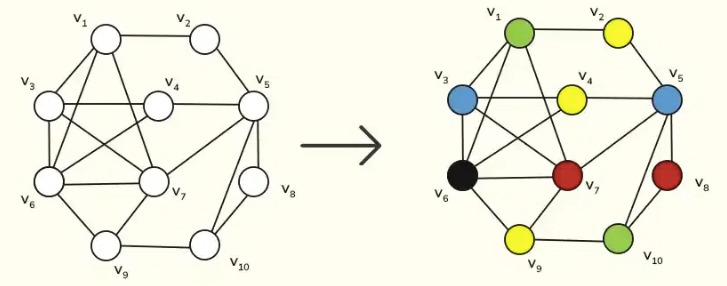

In [4]:
Example = Graph()

Example.add_undirected_edge("V1", "V2", 1)
Example.add_undirected_edge("V1", "V3", 1)
Example.add_undirected_edge("V1", "V6", 1)
Example.add_undirected_edge("V1", "V7", 1)
Example.add_undirected_edge("V2", "V5", 1)
Example.add_undirected_edge("V3", "V4", 1)
Example.add_undirected_edge("V3", "V6", 1)
Example.add_undirected_edge("V3", "V7", 1)
Example.add_undirected_edge("V4", "V5", 1)
Example.add_undirected_edge("V4", "V6", 1)
Example.add_undirected_edge("V5", "V7", 1)
Example.add_undirected_edge("V5", "V8", 1)
Example.add_undirected_edge("V5", "V10", 1)
Example.add_undirected_edge("V6", "V7", 1)
Example.add_undirected_edge("V6", "V9", 1)
Example.add_undirected_edge("V8", "V10", 1)
Example.add_undirected_edge("V9", "V10", 1)

In [5]:
print(Example)

V1 -> V2 (1)
V1 -> V3 (1)
V1 -> V6 (1)
V1 -> V7 (1)
V2 -> V1 (1)
V2 -> V5 (1)
V3 -> V1 (1)
V3 -> V4 (1)
V3 -> V6 (1)
V3 -> V7 (1)
V6 -> V1 (1)
V6 -> V3 (1)
V6 -> V4 (1)
V6 -> V7 (1)
V6 -> V9 (1)
V7 -> V1 (1)
V7 -> V3 (1)
V7 -> V5 (1)
V7 -> V6 (1)
V5 -> V2 (1)
V5 -> V4 (1)
V5 -> V7 (1)
V5 -> V8 (1)
V5 -> V10 (1)
V4 -> V3 (1)
V4 -> V5 (1)
V4 -> V6 (1)
V8 -> V5 (1)
V8 -> V10 (1)
V10 -> V5 (1)
V10 -> V8 (1)
V10 -> V9 (1)
V9 -> V6 (1)
V9 -> V10 (1)


***
### Implementação da Função contar_conflitos(grafo, coloracao). 

#### Entrada:

- o grafo (objeto da classe Graph)

- um dicionário coloracao, onde coloracao[vértice] = cor atribuída

#### Saída:

- número total de conflitos (arestas entre vértices de mesma cor)

In [6]:
def contar_conflitos(grafo, coloracao):
    conflitos = 0
    visitados = set()

    for u in grafo.graph:
        for vizinho in grafo.get_neighbors(u):
            if (u, vizinho) not in visitados and (vizinho, u) not in visitados:
                if coloracao[u] == coloracao[vizinho]:
                    conflitos += 1
                visitados.add((u, vizinho))
                visitados.add((vizinho, u))

    return conflitos

def retornar_conflitos(grafo, coloracao):
    visitados = set()
    conflitantes = set()

    for u in grafo.graph:
        for vizinho in grafo.get_neighbors(u):
            if (u, vizinho) not in visitados and (vizinho, u) not in visitados:
                if coloracao[u] == coloracao[vizinho]:
                    conflitantes.add((u))
                    conflitantes.add((vizinho))
                visitados.add((u, vizinho))
                visitados.add((vizinho, u))

    return len(conflitantes), list(conflitantes)

#### Explicação rápida:

- Percorremos todas as arestas do grafo.

- Para cada par (u, vizinho), verificamos se já contamos esse par (usando o conjunto visitados).

- Se os dois vértices tiverem a mesma cor, incrementamos o contador de conflitos.

Essa função será útil para guiar as heurísticas de busca que implementaremos a seguir. Vamos agora testar se ela funciona, passando como argumento uma coloração, ou seja, uma atribuição de cores a cada vértice na forma de um dicionário:

In [7]:
coloracao_exemplo = {
    "V1": "vermelho",
    "V2": "azul",
    "V3": "vermelho",
    "V4": "amarelo",
    "V5": "azul",
    "V6": "verde",
    "V7": "vermelho",
    "V8": "azul",
    "V9": "verde",
    "V10": "vermelho"
}

print("Conflitos:", contar_conflitos(Example, coloracao_exemplo))

Conflitos: 6


***
### Implementação da Função que gera uma atribuição (coloração) aleatória. 
- serve para gerar uma atribuição inicial para o problema de coloração de grafos.
- Entrada: Grafo de restrições e lista de possíveis cores para seus vértices.
- Saída: dicionário -> key: vertice, value: cor


In [8]:
import random

cores = ["vermelho", "azul", "verde", "amarelo"]

def gerar_coloracao_aleatoria(grafo, cores=cores):
    coloracao = {}
    for vertice in grafo.graph.keys():
        coloracao[vertice] = random.choice(cores)
    return coloracao

In [9]:
# Gerar uma coloração aleatória
coloracao_aleatoria = gerar_coloracao_aleatoria(Example)

# Mostrar a coloração gerada
print("Coloração Aleatória:")
for vertice, cor in coloracao_aleatoria.items():
    print(f"{vertice}: {cor}")

# Contar conflitos
num_conflitos = contar_conflitos(Example, coloracao_aleatoria)
print("\nNúmero de conflitos:", num_conflitos)

Coloração Aleatória:
V1: vermelho
V2: azul
V3: verde
V6: azul
V7: verde
V5: amarelo
V4: verde
V8: amarelo
V10: vermelho
V9: vermelho

Número de conflitos: 4


# Heurísticas

Nesta etapa, você deverá implementar algumas heurísticas de busca para resolver o problema de coloração.

***

### Implementação das Heurísticas:

#### Random Walk (RW)
- Escolhe aleatoriamente uma variável e muda sua cor aleatoriamente.
- Se melhorar (reduzir conflitos), aceita.
- Senão, também pode aceitar (não é obrigatório ser só melhoria, você pode definir uma probabilidade mais baixa para aceitar pioras).

#### Best Improvement (BI)
- Testa TODAS as mudanças possíveis (todos vértices e cores).
- Escolhe a mudança que mais reduz conflitos.

#### First Improvement com Any Conflict (FI with AC):
- Escolhe aleatoriamente uma variável que está em conflito.
- Tenta todas as cores possíveis para ela.
- Escolhe a cor que mais reduz conflitos (best color para aquela variável).

#### Simulated Annealing (SA)
- Parecido com FI, mas aceita piores soluções com uma probabilidade que diminui com o tempo (controle de temperatura).

#### Algoritmo Genético (GA):
- Evolui um conjunto de soluções candidatas, denominado população;
- A cada passo, as soluções atuais interagem entre si, através dos operadores de recombinação (crossover) e mutação (mutation) para produzir uma nova população. 

#### Random Walk (RW)

In [10]:
def random_walk(grafo, coloracao_inicial, cores, max_iter=1000, max_time=10):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)

    # def aceitar_mudanca(novos_conflitos, conflitos):
    #     if(novos_conflitos < conflitos): return True
    #     p = 0.1 # Probabilidade de aceitar mudancas que não reduzam conflitos
    #     if(random.random() <  p): return True
    #     return False
    ts = time.time()
    for _ in range(max_iter):
        # complete o codigo
        vizinho = random.choice(list(coloracao_exemplo.keys()))

        nova_coloracao = coloracao.copy()
        nova_coloracao[vizinho] = random.choice(cores)
        novos_conflitos = contar_conflitos(grafo, nova_coloracao)

        if(novos_conflitos < conflitos):
            coloracao = nova_coloracao
            conflitos = novos_conflitos

            if(conflitos == 0):
                break
        if (time.time() - max_time) > ts:
            break

    return coloracao, conflitos

#### Best Improvement (BI)

In [11]:
def best_improvement(grafo, coloracao_inicial, cores, max_iter=1000, max_time=10):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)
    ts = time.time()
    for _ in range(max_iter):
        # complete o codigo

        melhor_mudanca = coloracao.copy()
        melhor_melhora = 0

        for vertice in coloracao.keys():
            for cor in cores:
                nova_coloracao = coloracao.copy()
                nova_coloracao[vertice] = cor
                novos_conflitos = contar_conflitos(grafo, nova_coloracao)

                melhora = conflitos - novos_conflitos

                if(melhor_melhora < melhora):
                    melhor_mudanca = nova_coloracao
                    melhor_melhora = melhora

        coloracao = melhor_mudanca
        conflitos -= melhor_melhora
        if(conflitos == 0):
            break
        if (time.time() - max_time) > ts:
            break
    
    return coloracao, conflitos

#### First Improvement with Any Conflict (FI with AC)

In [12]:
def first_improvement_ac(grafo, coloracao_inicial, cores, max_iter=1000, max_time=10):
    coloracao = coloracao_inicial.copy()
    conflitos, vertices_conflitantes = retornar_conflitos(grafo, coloracao)

    if(conflitos == 0):
        return coloracao, conflitos
    ts = time.time()

    for _ in range(max_iter):

        vertice = random.choice(vertices_conflitantes)

        for cor in cores:
            nova_coloracao = coloracao.copy()
            nova_coloracao[vertice] = cor

            novos_conflitos, novos_vertices_conflitantes = retornar_conflitos(grafo, nova_coloracao)

            if(novos_conflitos < conflitos):
                conflitos = novos_conflitos
                coloracao = nova_coloracao

                if(conflitos == 0):
                    break
                vertices_conflitantes = novos_vertices_conflitantes
        if (time.time() - max_time) > ts:
            break

    return coloracao, conflitos

#### Simulated Annealing (SA)

In [13]:
import math

def simulated_annealing(grafo, coloracao_inicial, cores, max_iter=1000, temperatura_inicial=1000, taxa_resfriamento=0.995, max_time=10):
    coloracao = coloracao_inicial.copy()
    conflitos, vertices_conflitantes = retornar_conflitos(grafo, coloracao)
    temperatura = temperatura_inicial

    if(conflitos == 0):
        return coloracao, conflitos

    def aceitar_mudanca(novos_conflitos, conflitos, temperatura):
        if novos_conflitos <= conflitos:
            return True
        
        p = math.exp(-(novos_conflitos - conflitos) / temperatura)
        return random.random() < p
    ts = time.time()
    for _ in range(max_iter):

        vertice = random.choice(vertices_conflitantes)

        for cor in cores:
            nova_coloracao = coloracao.copy()
            nova_coloracao[vertice] = cor

            novos_conflitos, novos_vertices_conflitantes = retornar_conflitos(grafo, nova_coloracao)

            if(aceitar_mudanca(novos_conflitos, conflitos, temperatura)):
                conflitos = novos_conflitos
                coloracao = nova_coloracao
                if(conflitos == 0):
                    break

                vertices_conflitantes = novos_vertices_conflitantes

        temperatura = temperatura * taxa_resfriamento # Geometric Cooling
        if (time.time() - max_time) > ts:
            break

    return coloracao, conflitos

#### Genetic Algorithm (GA)

In [14]:
##### Funções Auxiliares para o GA

# Observação: Um indivíduo na população do GA é representado por uma coloração do grafo.
# dicionario coloracao[vértice] = cor atribuída

# - Evolui um conjunto de soluções candidatas, denominado população;
# - A cada passo, as soluções atuais interagem entre si, através dos operadores de recombinação (crossover) e mutação (mutation) para produzir uma nova população. 

# Gera a população inicial de indivíduos com colorações aleatórias.
def criar_populacao_inicial(grafo, num_individuos, cores_disponiveis):
    
    # implemente a função
    populacao = []

    for _ in range(num_individuos):
        coloracao = gerar_coloracao_aleatoria(grafo, cores_disponiveis)
        populacao.append(coloracao)
    
    # a populacao pode ser modelada como uma lista de colorações aleatórias
    return populacao

# Calcula o fitness de um indivíduo usando a função contar_conflitos(grafo, coloracao).  
def calcula_fitness(individuo, grafo):
    
    # implemente a função
    fitness = contar_conflitos(grafo, individuo)
    return fitness

#  Seleção com probabilidade proporcional a e^(-h(A)/temperatura).
#  O 'custo' h(A) é o número de conflitos.  
# def selecao_com_annealing(populacao, temperatura):
def selecao_com_annealing(populacao, grafo, temperatura):

    def aceitar_mudanca(fitness_do_melhor_individuo, fitness, temperatura):
        if fitness <= fitness_do_melhor_individuo:
            return True
        
        p = math.exp(-(fitness - fitness_do_melhor_individuo) / temperatura)
        return random.random() < p

    # implemente a função
    # retorna o indice do individuo selecionado
    individuo_selecionado = 0
    fitness_do_melhor_individuo = calcula_fitness(populacao[individuo_selecionado], grafo)

    for i in range(len(populacao)):
        fitness = calcula_fitness(populacao[i], grafo)

        if(aceitar_mudanca(fitness_do_melhor_individuo, fitness, temperatura)):
            fitness_do_melhor_individuo = fitness
            individuo_selecionado = i
        
    return individuo_selecionado, fitness_do_melhor_individuo


# Faz o cruzamento de um ponto entre dois indivíduos (pai1 e pai2).
def crossover(pai1, pai2):
    
    # Seleciona um ponto de corte aleatório.
    # complete o codigo
    
    # Combina as partes dos pais para criar dois filhos.
    # complete o codigo

    ponto_de_corte = random.randint(0, len(pai1) - 1)
    
    filho1 = {}
    filho2 = {}

    i = 0
    for key in pai1.keys():

        if(i <= ponto_de_corte):
            filho1[key] = pai1[key]
            filho2[key] = pai2[key]
        else:
            filho1[key] = pai2[key]
            filho2[key] = pai1[key]
        i += 1
    
    return filho1, filho2

# Escolhe aleatoriamente um vértice do indivíduo e muda sua cor aleatoriamente com probabilidade = taxa_mutacao.
def mutation(individuo, cores, taxa_mutacao):

    if random.random() <= taxa_mutacao:
        atributo = random.choice(list(individuo))
        cor_atual = individuo[atributo]
        novas_cores = [c for c in cores if c != cor_atual]
        individuo[atributo] = random.choice(novas_cores)
        
    return individuo
    

In [15]:
import random
import math


def algoritmo_genetico(grafo, num_individuos, num_geracoes, cores, taxa_mutacao, temperatura_inicial, taxa_resfriamento, max_time=10):
    
    populacao = criar_populacao_inicial(grafo, num_individuos, cores) # cria populacao inicial
    
    temperatura = temperatura_inicial 

    melhor_individuo, melhor_fitness = selecao_com_annealing(populacao, grafo, temperatura)

    ts = time.time()
    for geracao in range(num_geracoes): # repeat until termination
        
        # Avalia a população
        # for individuo in populacao:
        #     avaliar_fitness(individuo, grafo)
        
        # get o melhor_individuo e seu fitness
        melhor_individuo, melhor_fitness = selecao_com_annealing(populacao, grafo, temperatura)
        
        # complete o codigo
        # melhor_fitness = avaliar_fitness(melhor_individuo, grafo)
        
        # if some A in Pop satisfies all constraints then return A
        if melhor_fitness == 0:
            return populacao[melhor_individuo], melhor_fitness

        # Npop := {}
        # nova_populacao = [populacao[melhor_individuo].copy()]
        nova_populacao = []
        
        # repeat k/2 times
        for _ in range(num_individuos // 2):
           # complete o codigo

            pai_1 = populacao[random.randint(0, len(populacao) - 1)]
            pai_2 = populacao[random.randint(0, len(populacao) - 1)]

            filho_1, filho_2 = crossover(pai_1, pai_2)

            filho_1_mutado = mutation(filho_1, cores, taxa_mutacao)
            filho_2_mutado = mutation(filho_2, cores, taxa_mutacao)

            nova_populacao.extend([filho_1_mutado, filho_2_mutado])
            
        # Pop := Npop
        populacao = nova_populacao

        # T is updated according to S
        temperatura *= taxa_resfriamento
        if (time.time() - max_time) > ts:
            break
        
    return populacao[melhor_individuo], melhor_fitness

In [16]:
def d_satur(grafo, cores, max_iter=1000, max_time=10):

    # Retorna quantidade de cores diferentes utilizadas pelos vizinhos de um vertice
    def calcular_saturacao(grafo, vertice, coloracao_atual):
        cor_dos_vizinhos = {
            coloracao_atual[v]
            for v in grafo.get_neighbors(vertice)
            if coloracao_atual[v] is not None
        }
        return len(cor_dos_vizinhos), cor_dos_vizinhos

    def aceitar_vertice(maior_saturacao, saturacao, vertice_mais_saturado, vertice):
        if(vertice_mais_saturado is None): 
            return True
        
        if(maior_saturacao < saturacao):
            return True
        
        # Em caso de empate na saturacao é escolhido vertice de maior grau

        if(maior_saturacao == saturacao):    

            grau_vertice_mais_saturado = grafo.in_degree(vertice_mais_saturado) + grafo.out_degree(vertice_mais_saturado)
            grau_vertice = grafo.in_degree(vertice) + grafo.out_degree(vertice)

            if(grau_vertice_mais_saturado <= grau_vertice):
                return True
            
        return False


    # Inicia coloracao dos vertices com None
    coloracao = {}
    for aresta in grafo.get_edges():
        if(aresta.u not in coloracao):
            coloracao[aresta.u] = None
        if(aresta.v not in coloracao):
            coloracao[aresta.v] = None

    ts = time.time()

    for _ in range(max_iter):

        maior_saturacao = 0
        vertice_mais_saturado = None
        melhores_cores_indisponiveis  = []
       
        # Escolhe novo vertice a ser colorido
        for vertice in coloracao.keys():
            if(coloracao[vertice] is not None): # Ja esta colorido
                continue

            saturacao, cores_indisponiveis = calcular_saturacao(grafo, vertice, coloracao)

            if(aceitar_vertice(maior_saturacao, saturacao, vertice_mais_saturado, vertice)):
                maior_saturacao = saturacao
                vertice_mais_saturado = vertice
                melhores_cores_indisponiveis = cores_indisponiveis

        # Todos os vertices já foram coloridos
        if(vertice_mais_saturado is None):
            break

        # Escolhe primeira cor disponivel e colore o vertice
        for cor in cores:
            if(cor not in melhores_cores_indisponiveis):
                coloracao[vertice_mais_saturado] = cor
                # print(f"Cor {cor} escolhida pro vertice {vertice_mais_saturado}")
                break

        if (time.time() - max_time) > ts:
            break

    conflitos = contar_conflitos(grafo, coloracao)
    return coloracao, conflitos

In [17]:
coloracao, conflitos = d_satur(Example, cores)
print(f"Coloracao: {coloracao}")
print(f"Conflitos: {conflitos}")


Coloracao: {'V1': 'amarelo', 'V2': 'azul', 'V3': 'verde', 'V6': 'vermelho', 'V7': 'azul', 'V5': 'vermelho', 'V4': 'azul', 'V9': 'verde', 'V8': 'verde', 'V10': 'azul'}
Conflitos: 0


***
### Testando as heurísticas de Busca Local:

- Gera uma coloração inicial aleatória.

- Chama cada uma das heurísticas de busca local.

- Mostra o número de conflitos obtido para cada heurística.


In [18]:
cores = ["vermelho", "azul", "verde", "amarelo"]
    
# Gerar uma coloração inicial aleatória
coloracao_inicial = gerar_coloracao_aleatoria(Example, cores)

print("Coloração inicial:")
for vertice, cor in coloracao_inicial.items():
    print(f"{vertice}: {cor}")

conflitos_iniciais = contar_conflitos(Example, coloracao_inicial)
print("\nConflitos iniciais:", conflitos_iniciais)


print("\n--- Aplicando heurísticas ---\n")

# define o número máximo de passos de execução para cada heurística de busca local
max_steps = 1000

# Random Walk
coloracao_rw, conflitos_rw = random_walk(Example, coloracao_inicial, cores, max_steps)
print("Random Walk (RW):")
print(f"Conflitos finais: {conflitos_rw}")
print(coloracao_rw)

# Best Improvement
coloracao_bi, conflitos_bi = best_improvement(Example, coloracao_inicial, cores, max_steps)
print("\nBest Improvement (BI):")
print(f"Conflitos finais: {conflitos_bi}")
print(coloracao_bi)


# First Improvement - Any Conflict
coloracao_fi_ac, conflitos_fi_ac = first_improvement_ac(Example, coloracao_inicial, cores, max_steps)
print("\nFirst Improvement - Any Conflict (FI-AC):")
print(f"Conflitos finais: {conflitos_fi_ac}")
print(coloracao_fi_ac)

# Simulated Annealing

# define parametros do simulated annealing:
t_0 = 10 # temperatura inicial
alpha = 0.9 # taxa de resfriamento

coloracao_sa, conflitos_sa = simulated_annealing(Example, coloracao_inicial, cores, max_steps, temperatura_inicial=t_0, taxa_resfriamento=alpha)
print("\nSimulated Annealing (SA):")
print(f"Conflitos finais: {conflitos_sa}")
print(coloracao_sa)

Coloração inicial:
V1: azul
V2: amarelo
V3: vermelho
V6: amarelo
V7: vermelho
V5: vermelho
V4: amarelo
V8: verde
V10: azul
V9: amarelo

Conflitos iniciais: 4

--- Aplicando heurísticas ---

Random Walk (RW):
Conflitos finais: 0
{'V1': 'verde', 'V2': 'amarelo', 'V3': 'vermelho', 'V6': 'amarelo', 'V7': 'azul', 'V5': 'vermelho', 'V4': 'verde', 'V8': 'verde', 'V10': 'azul', 'V9': 'verde'}

Best Improvement (BI):
Conflitos finais: 0
{'V1': 'azul', 'V2': 'amarelo', 'V3': 'vermelho', 'V6': 'verde', 'V7': 'amarelo', 'V5': 'vermelho', 'V4': 'amarelo', 'V8': 'verde', 'V10': 'azul', 'V9': 'amarelo'}

First Improvement - Any Conflict (FI-AC):
Conflitos finais: 2
{'V1': 'azul', 'V2': 'amarelo', 'V3': 'verde', 'V6': 'amarelo', 'V7': 'amarelo', 'V5': 'vermelho', 'V4': 'azul', 'V8': 'verde', 'V10': 'azul', 'V9': 'vermelho'}

Simulated Annealing (SA):
Conflitos finais: 0
{'V1': 'azul', 'V2': 'verde', 'V3': 'verde', 'V6': 'amarelo', 'V7': 'vermelho', 'V5': 'amarelo', 'V4': 'vermelho', 'V8': 'verde', 'V1

***
### Testando o algoritmo genético:


In [19]:
# Parâmetros
NUM_INDIVIDUOS = 100
NUM_GERACOES = 500
CORES = ["vermelho", "azul", "verde", "amarelo"]
TAXA_MUTACAO = 0.05
TEMPERATURA_INICIAL = 10
TAXA_RESFRIAMENTO = 0.9

# Execução
print("--- Executando o Algoritmo Genético ---")
coloracao_ga, conflitos_ga = algoritmo_genetico(Example, NUM_INDIVIDUOS, NUM_GERACOES, CORES, TAXA_MUTACAO, TEMPERATURA_INICIAL, TAXA_RESFRIAMENTO)

# Impressão do resultado
print("\n Algoritmo Genético (GA):")
print(f"Conflitos finais: {conflitos_ga}")
print(coloracao_ga)


--- Executando o Algoritmo Genético ---

 Algoritmo Genético (GA):
Conflitos finais: 0
{'V1': 'amarelo', 'V2': 'vermelho', 'V3': 'verde', 'V6': 'vermelho', 'V7': 'azul', 'V5': 'amarelo', 'V4': 'azul', 'V8': 'azul', 'V10': 'verde', 'V9': 'amarelo'}


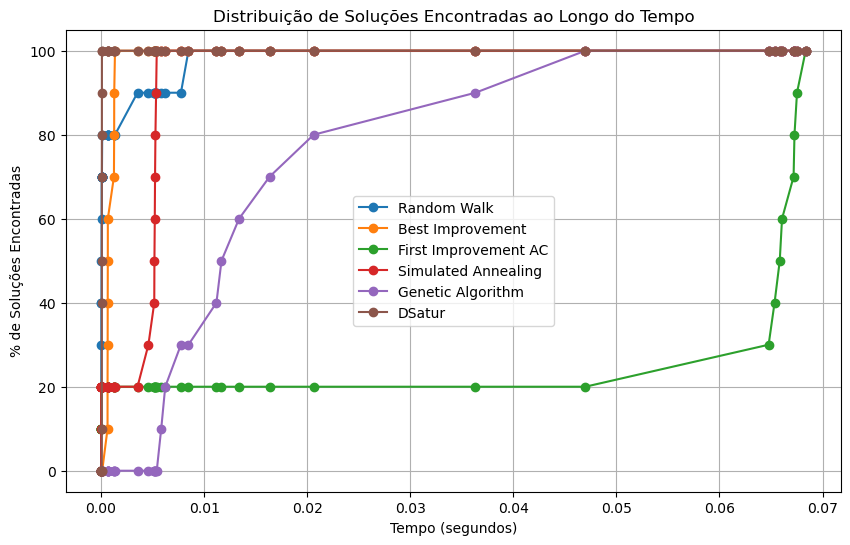

Processing file: myciel5.col


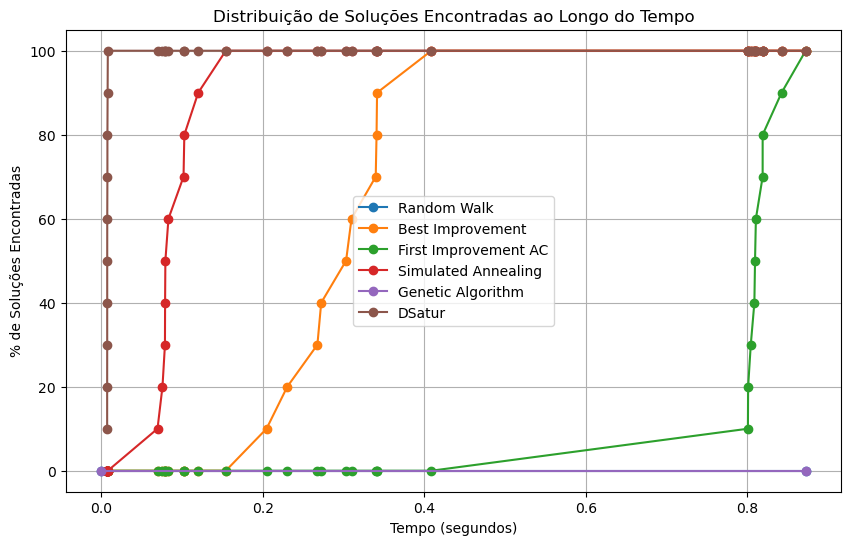

Processing file: queen9-9.col


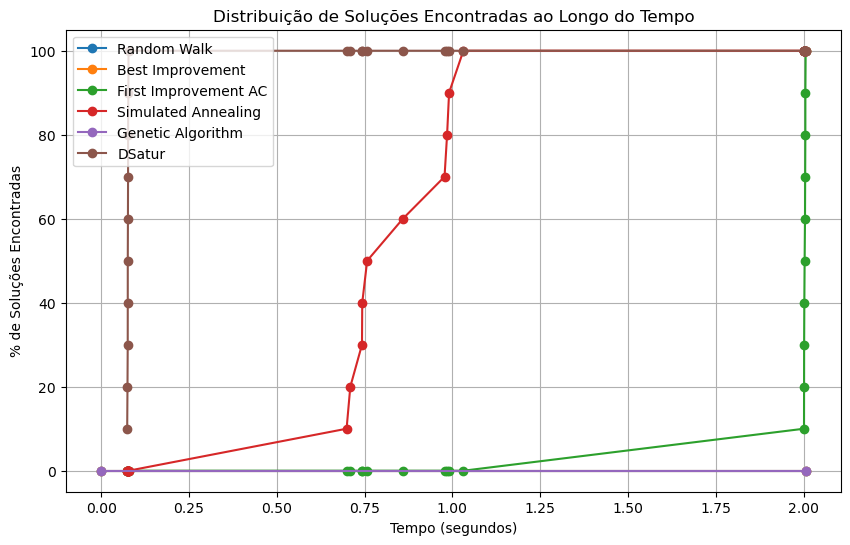

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os

cores = [
    "vermelho", "azul", "verde", "amarelo",
    "laranja", "roxo", "rosa", "marrom",
    "cinza", "preto", "branco", "ciano",
    "magenta", "turquesa", "lima", "salmão",
    "olive", "bege", "púrpura", "índigo"
]

def generate_distribution_data(problem_instance=Example):
    times = []
    coloracao_inicial = gerar_coloracao_aleatoria(problem_instance, cores)
    max_steps = 1000
    time_limit = 2 # 2 seconds
    
    # Random Walk
    start_time = time.time()
    coloracao, conflitos =  random_walk(problem_instance, coloracao_inicial, cores, max_steps, max_time=time_limit)
    times.append(time.time() - start_time if conflitos == 0 else -1)

    # Best Improvement
    start_time = time.time()
    coloracao, conflitos =  best_improvement(problem_instance, coloracao_inicial, cores, max_steps, max_time=time_limit)
    times.append(time.time() - start_time if conflitos == 0 else -1)

    # First Improvement AC
    start_time = time.time()
    coloracao, conflitos =  first_improvement_ac(problem_instance, coloracao_inicial, cores, max_steps, max_time=time_limit)
    times.append(time.time() - start_time if conflitos == 0 else -1)

    # Simulated Annealing
    start_time = time.time()
    coloracao, conflitos =  simulated_annealing(problem_instance, coloracao_inicial, cores, max_steps, temperatura_inicial=t_0, taxa_resfriamento=alpha, max_time=time_limit)
    times.append(time.time() - start_time if conflitos == 0 else -1)

    # Genetic Algorithm
    start_time = time.time()
    coloracao, conflitos =  algoritmo_genetico(problem_instance, NUM_INDIVIDUOS, NUM_GERACOES, CORES, TAXA_MUTACAO, TEMPERATURA_INICIAL, TAXA_RESFRIAMENTO, max_time=time_limit)
    times.append(time.time() - start_time if conflitos == 0 else -1)

    # DSatur
    start_time = time.time()
    coloracao, conflitos =  d_satur(problem_instance, cores, max_steps, max_time=time_limit)
    times.append(time.time() - start_time if conflitos == 0 else -1)

    return times


# generate multiple times to have a better distribution
def generate_distributions_data(runs = 20, problem_instance=Example):
    all_times = []
    for _ in range(runs):
        times = generate_distribution_data(problem_instance=problem_instance)
        all_times.append(times)
    return all_times

def plot_distribution(algorithm_names, all_times, filename=None):
    """Plots the % of solutions found over time for each algorithm."""
    plt.figure(figsize=(10, 6))
    arr_2d = np.array(all_times)
    # Get unique sorted times for x-axis
    unique_times = np.sort(np.unique(arr_2d))
    unique_times = unique_times[unique_times != -1]  # Remove -1 values

    
    # For each algorithm, calculate cumulative percentage
    for i, alg in enumerate(algorithm_names):
        # Extract times for this algorithm across all runs (column i)
        alg_times = arr_2d[:, i]
        alg_times = alg_times[alg_times != -1]  # Remove unsuccessful runs

        if len(alg_times) <= 0:
            plt.plot([0, max(unique_times)], [0, 0], label=alg, marker='o')  # No data to plot
            continue

        # Calculate percentage of solutions found by each time threshold
        percentages = [(alg_times <= t).sum() / len(alg_times) * 100 for t in unique_times]
        
        plt.plot(unique_times, percentages, label=alg, marker='o')
    

    plt.xlabel('Tempo (segundos)')
    plt.ylabel('% de Soluções Encontradas')
    plt.title('Distribuição de Soluções Encontradas ao Longo do Tempo')
    plt.legend()
    plt.grid()
    if(filename):
        plt.savefig(filename)
    plt.show()
    

algorithm_names = ['Random Walk', 'Best Improvement', 'First Improvement AC', 'Simulated Annealing', 'Genetic Algorithm', 'DSatur']


def create_queen_graph(file):
    g = Graph()
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            if (not line.strip().startswith('e')):
                continue
            _, u, v = line.strip().split()
            g.add_undirected_edge(f"V{u}", f"V{v}", 1)
    return g

n_runs = 10
all_times = generate_distributions_data(runs=n_runs, problem_instance=Example)
save_path = os.path.join(os.getcwd(), '../docs/report/img/output-default.png')
plot_distribution(algorithm_names, all_times, filename=save_path)

for root, dirs, files in os.walk(os.path.join(os.getcwd(), '../data')):
    for file in files:
        print(f'Processing file: {file}')
        if file.endswith('.col'):
            graph_path = os.path.join(root, file)
            queen_graph = create_queen_graph(graph_path)
            all_times = generate_distributions_data(runs=n_runs, problem_instance=queen_graph)
            save_path = os.path.join(root, f'../docs/report/img/output-{file[:-4]}.png')
            plot_distribution(algorithm_names, all_times, filename=save_path)
